In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, roc_curve,roc_auc_score, average_precision_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict

In [2]:
df = pd.read_csv(r"D:\Coding\Code\Python\ML\Data\hospital_readmissions.csv")
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [3]:
df.isna().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [4]:
df.shape

(25000, 17)

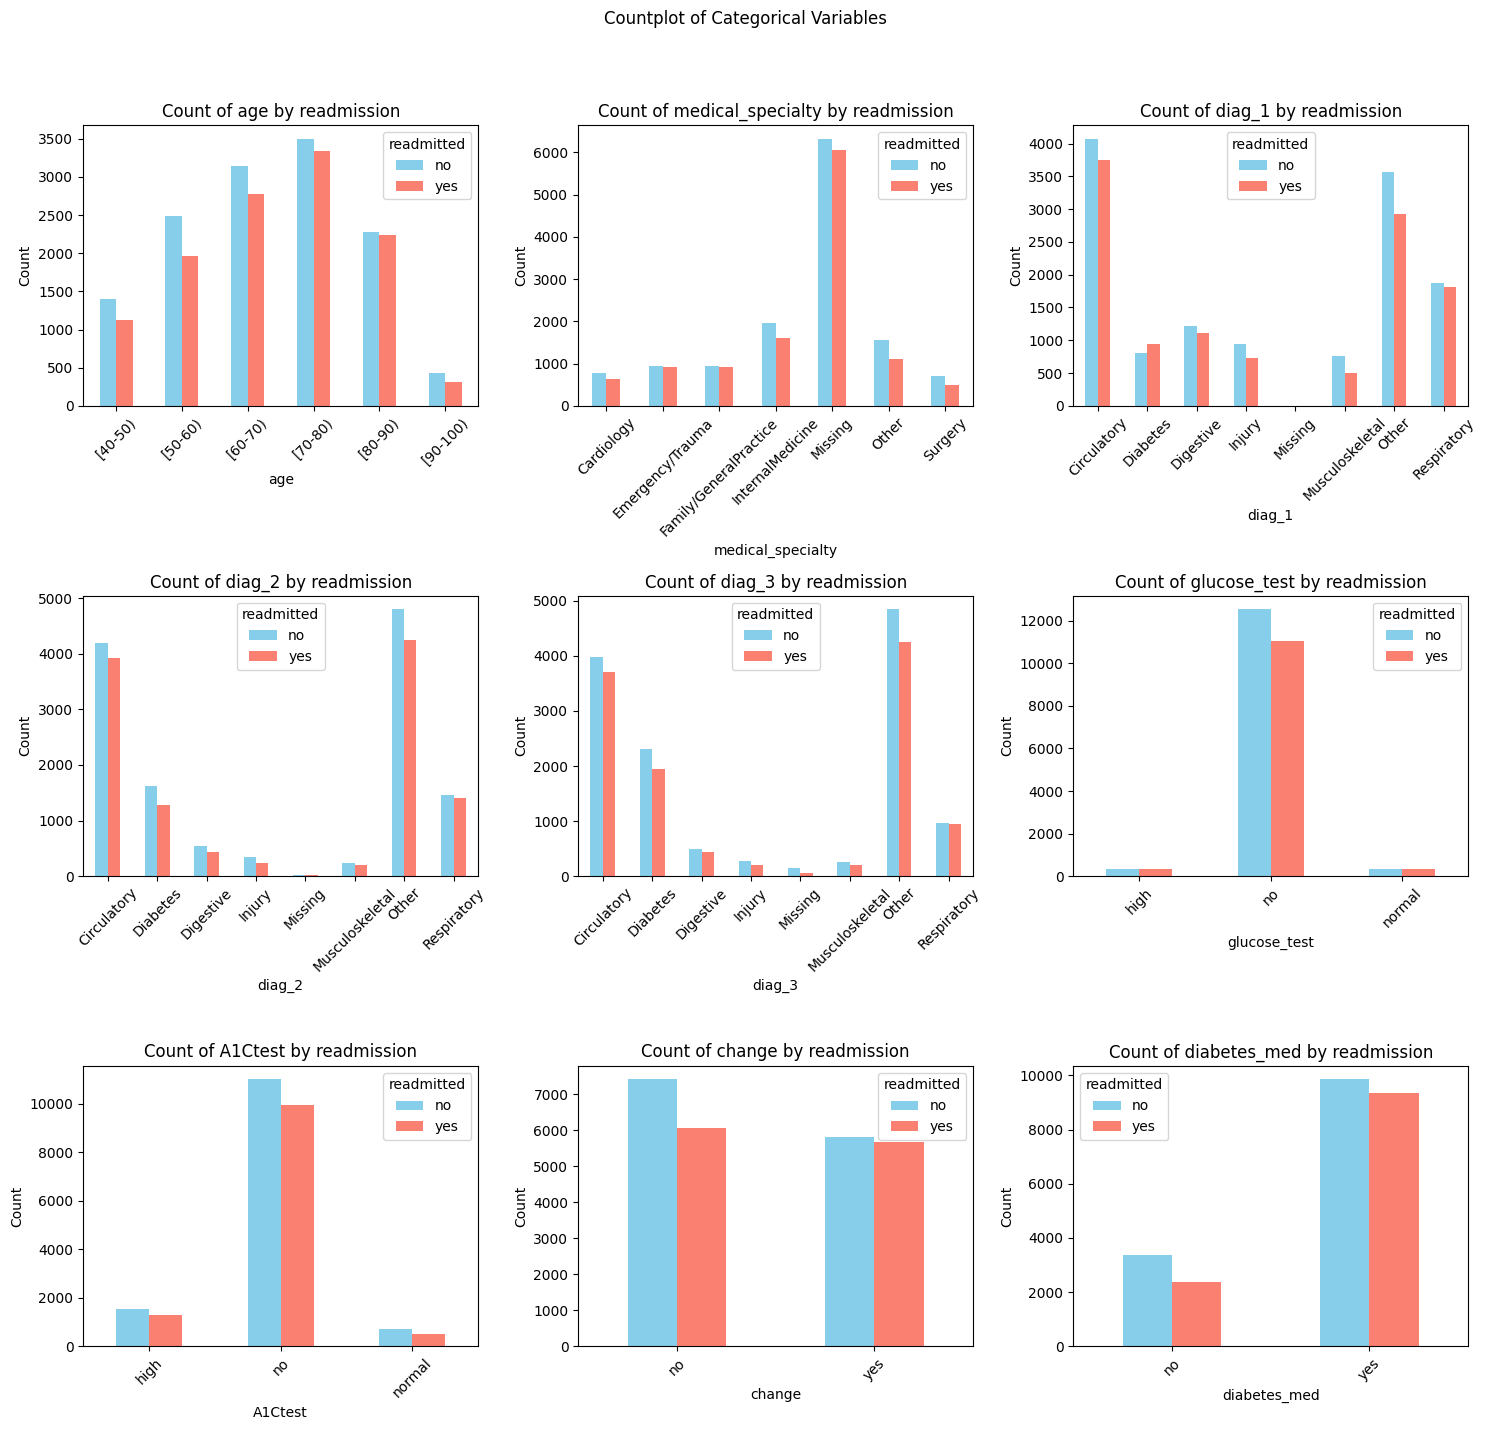

In [ ]:
cat_vars = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3','glucose_test', 'A1Ctest', 'change', 'diabetes_med']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axs = axs.flatten()

fig.suptitle("Countplot of Categorical Variables")

for i, var in enumerate(cat_vars):
    # Get the counts of each unique value in the column, split by 'readmitted'
    count_data = df.groupby([var, 'readmitted']).size().unstack(fill_value=0)
    
    # Plotting the bar chart for each unique value in 'var'
    count_data.plot(kind='bar', stacked=False, ax=axs[i], color=['skyblue', 'salmon'])

    axs[i].set_title(f'Count of {var} by readmission')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Count')
    axs[i].tick_params(axis='x', rotation=45)

fig.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()


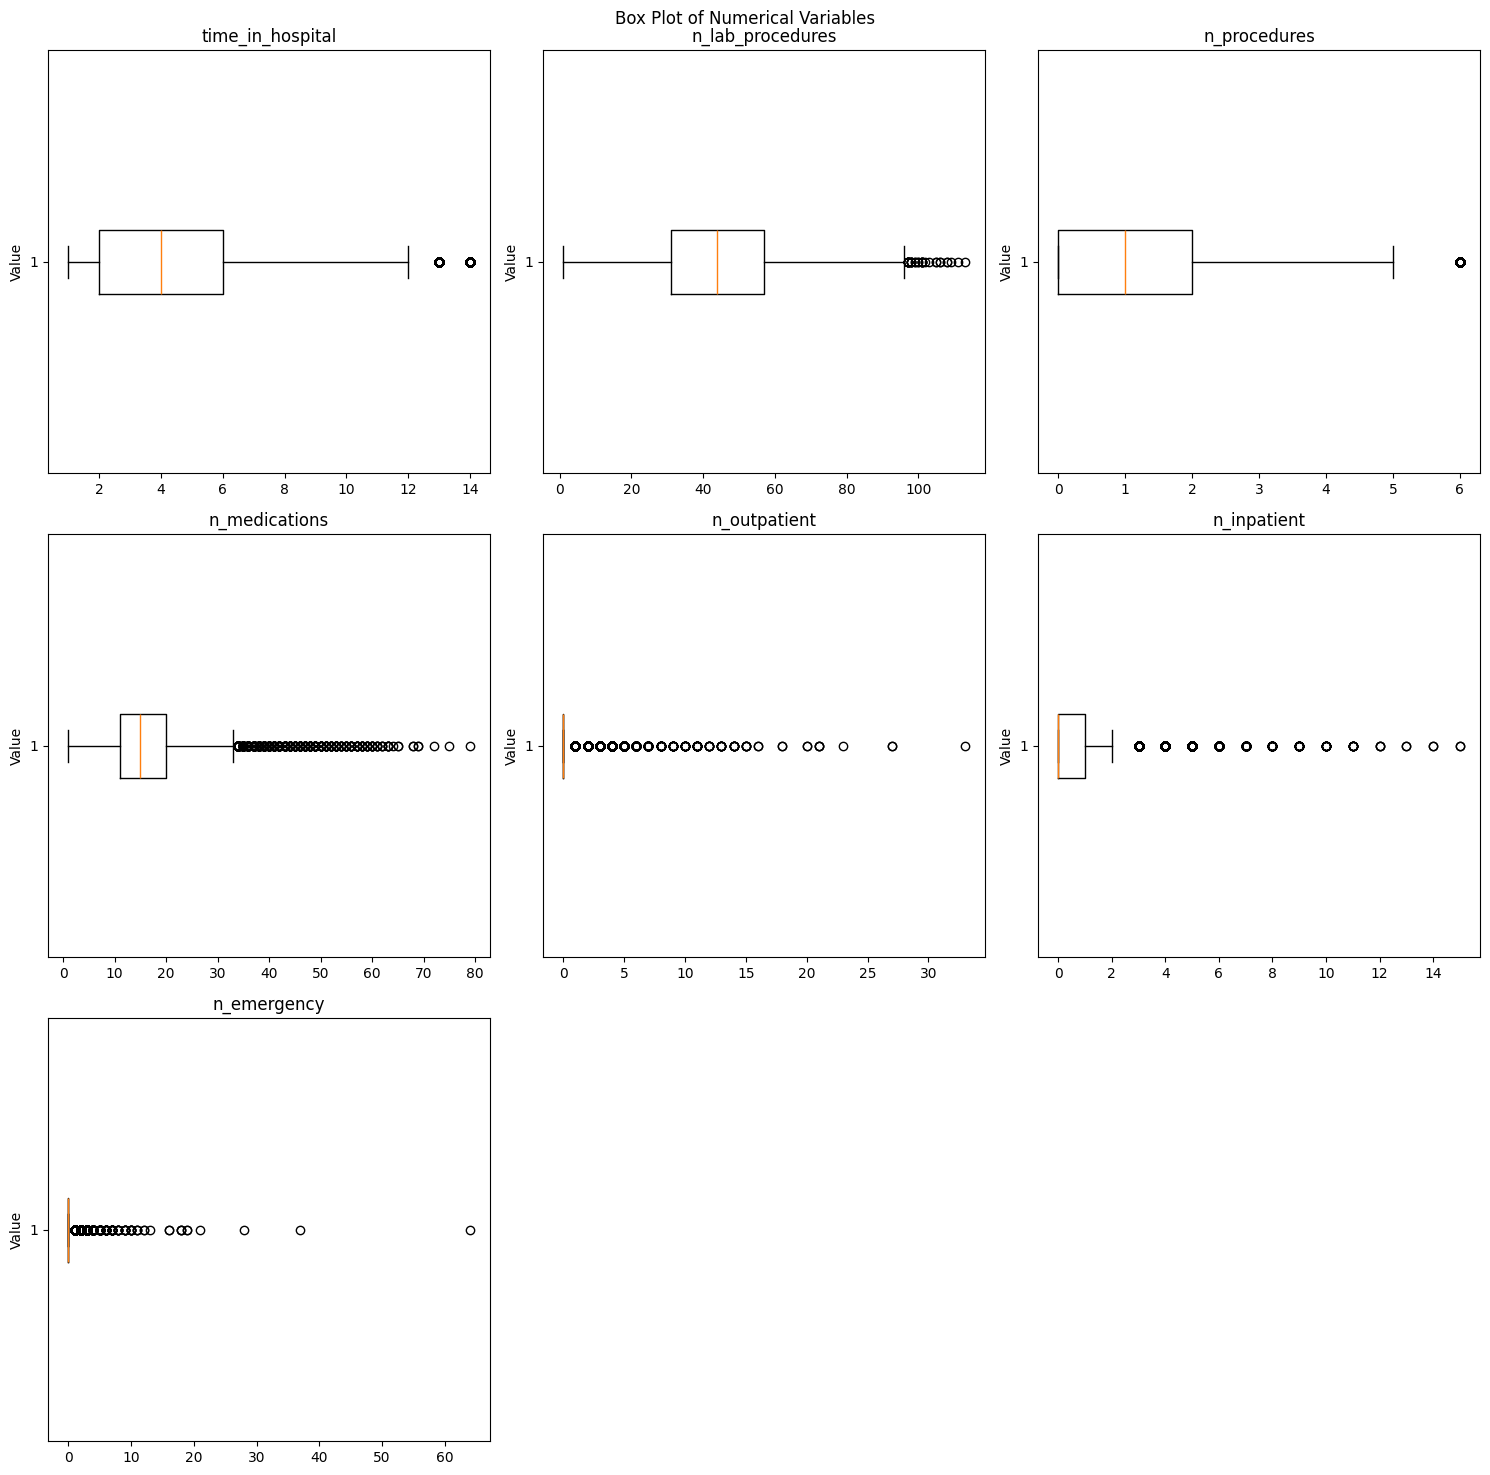

In [ ]:
num_vars = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()

fig.suptitle("Box Plot of Numerical Variables")

for i, var in enumerate(num_vars):
    axs[i].boxplot(df[var], vert=False)  
    axs[i].set_title(var)
    axs[i].set_ylabel('Value')

# Removing 8th and 9th subplot
fig.delaxes(axs[7])
fig.delaxes(axs[8])

fig.tight_layout()
plt.show()

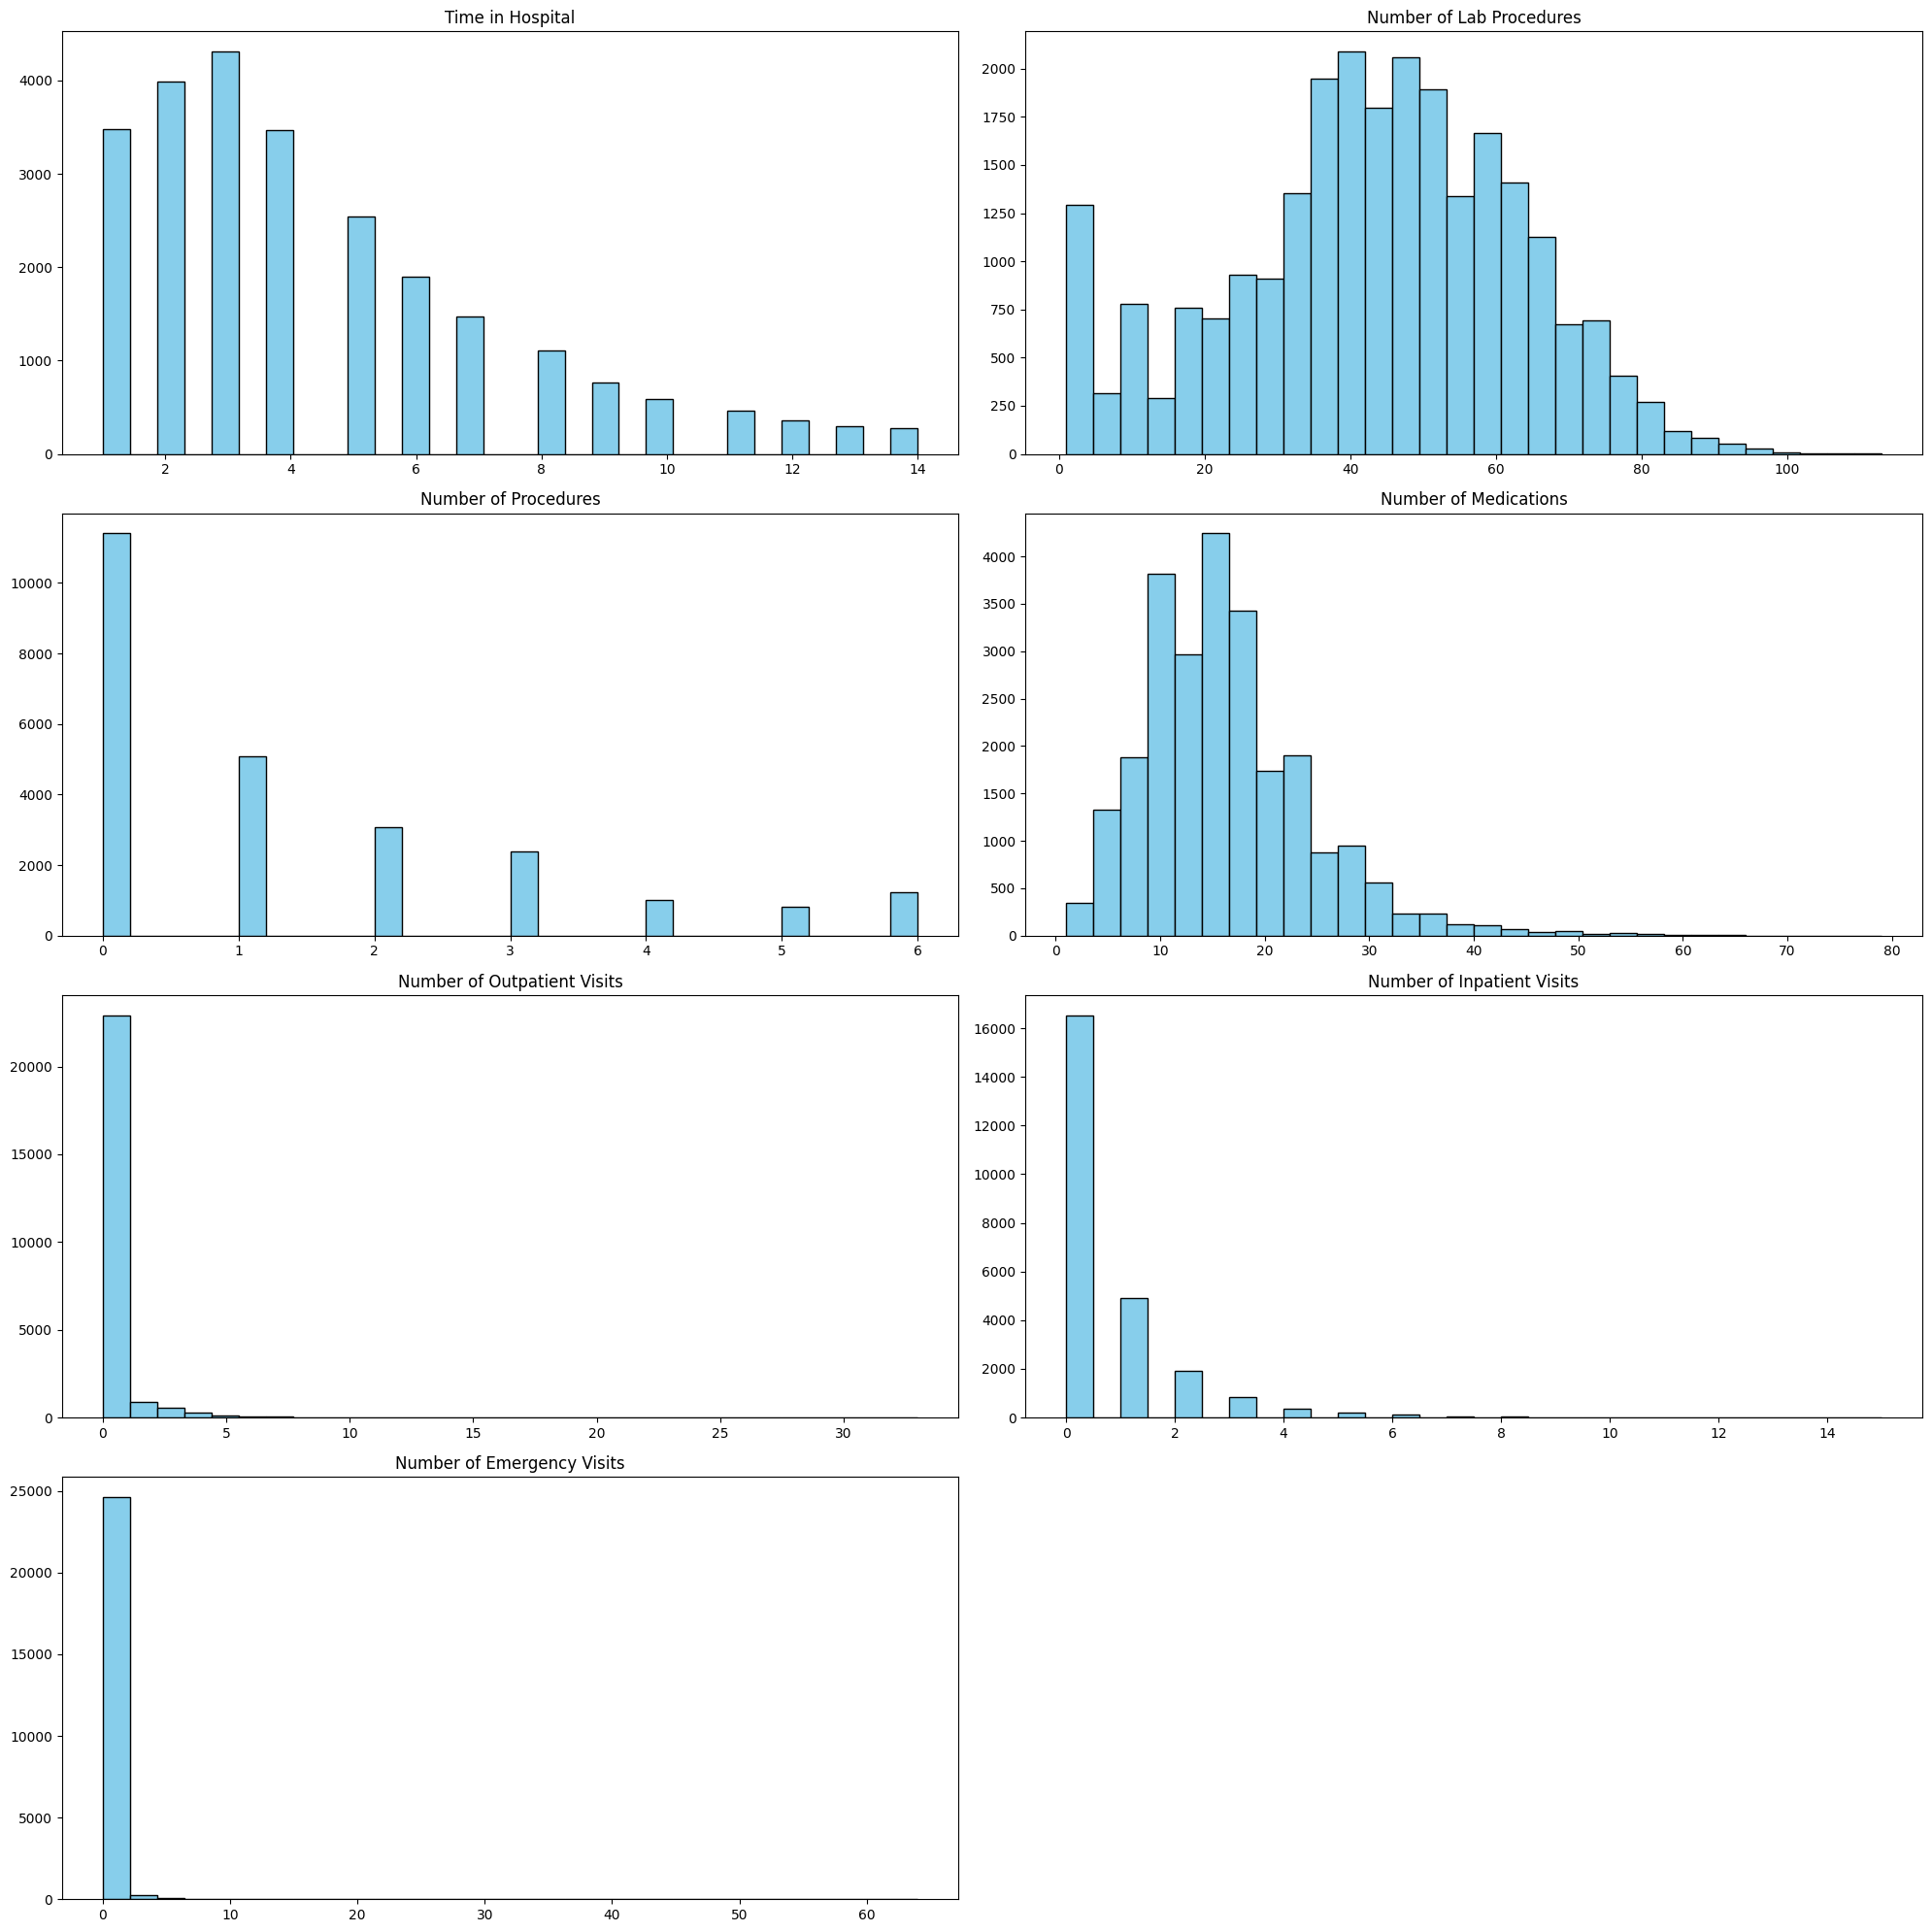

In [ ]:
plt.figure(figsize=(20, 20))
plt.subplot(4, 2, 1)
plt.hist(df['time_in_hospital'], bins=30, color='skyblue', edgecolor='black')
plt.title('Time in Hospital')

plt.subplot(4, 2, 2)
plt.hist(df['n_lab_procedures'], bins=30, color='skyblue', edgecolor='black')
plt.title('Number of Lab Procedures')

plt.subplot(4, 2, 3)
plt.hist(df['n_procedures'], bins=30, color='skyblue', edgecolor='black')
plt.title('Number of Procedures')

plt.subplot(4, 2, 4)
plt.hist(df['n_medications'], bins=30, color='skyblue', edgecolor='black')
plt.title('Number of Medications')

plt.subplot(4, 2, 5)
plt.hist(df['n_outpatient'], bins=30, color='skyblue', edgecolor='black')
plt.title('Number of Outpatient Visits')

plt.subplot(4, 2, 6)
plt.hist(df['n_inpatient'], bins=30, color='skyblue', edgecolor='black')
plt.title('Number of Inpatient Visits')

plt.subplot(4, 2, 7)
plt.hist(df['n_emergency'], bins=30, color='skyblue', edgecolor='black')
plt.title('Number of Emergency Visits')

# To handle the empty subplot (8th subplot)
plt.subplot(4, 2, 8)
plt.axis('off')

plt.tight_layout()
plt.show()

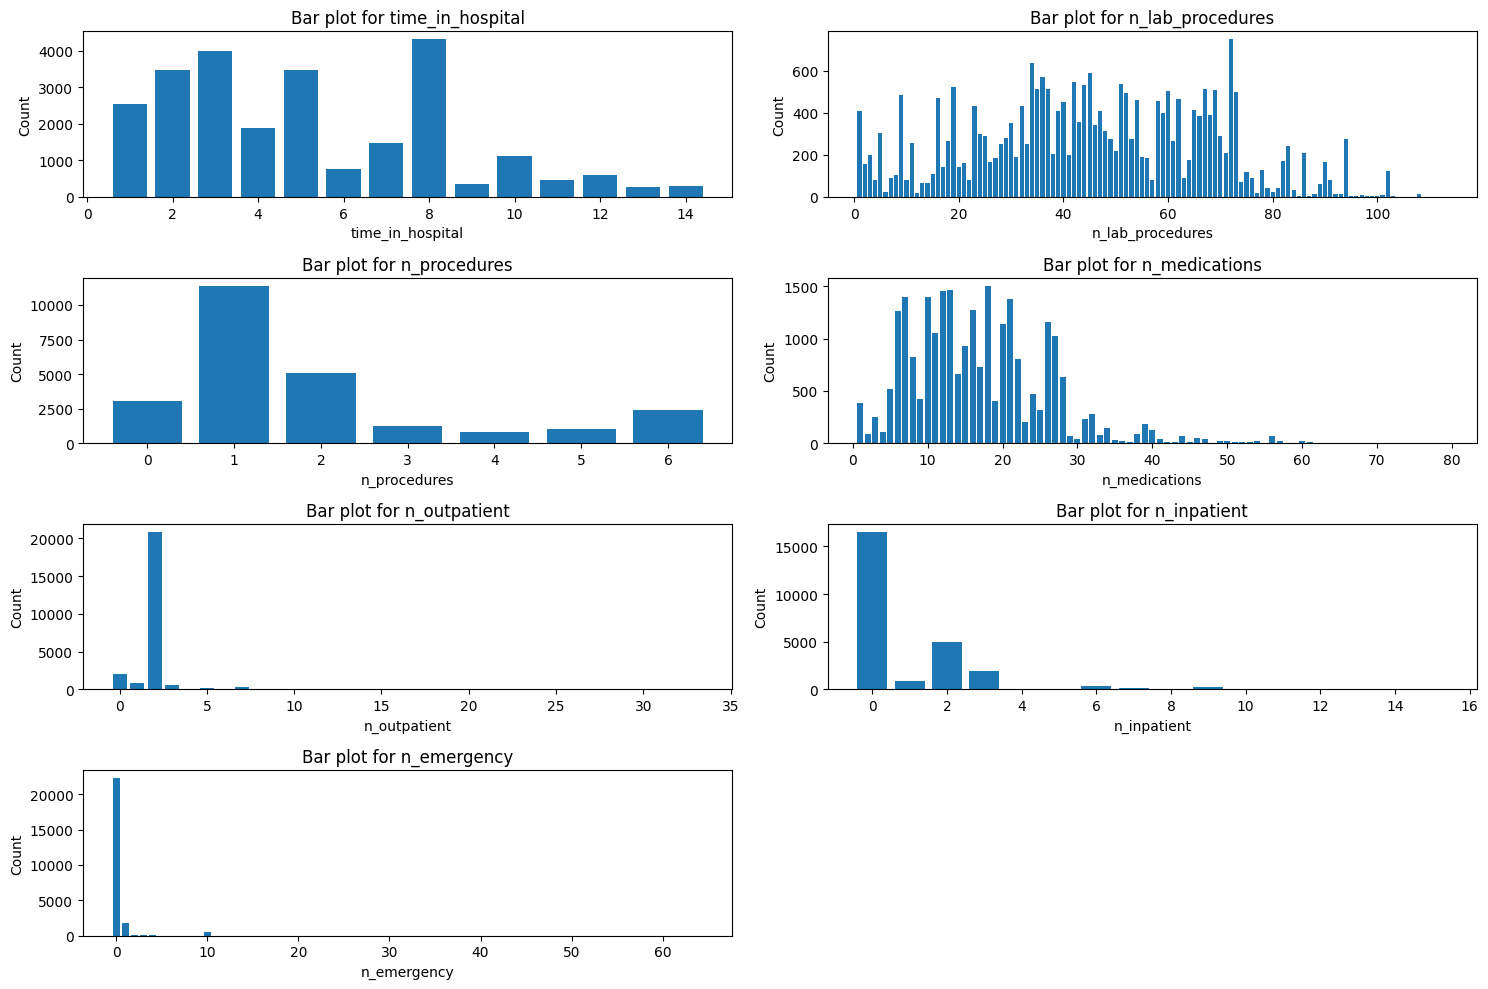

In [ ]:
columns = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications',
           'n_outpatient', 'n_inpatient', 'n_emergency']

plt.figure(figsize=(15, 10))

for i, col in enumerate(columns, 1):
    plt.subplot(4, 2, i) 
    plt.bar(df[col].unique(), df[col].value_counts())
    plt.title(f'Bar plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [9]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [10]:
df.age.unique()

array(['[70-80)', '[50-60)', '[60-70)', '[40-50)', '[80-90)', '[90-100)'],
      dtype=object)

In [11]:
df.age = df.age.map({"[40-50)": 0, "[50-60)": 1, "[60-70)": 2, "[70-80)": 3, "[80-90)": 4, "[90-100)": 5})
df.age

0        3
1        3
2        1
3        3
4        2
        ..
24995    4
24996    4
24997    3
24998    3
24999    1
Name: age, Length: 25000, dtype: int64

In [ ]:
le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':  # Check if column is of type string
        df[column] = le.fit_transform(df[column])  

df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,3,8,72,1,18,2,0,0,4,0,7,6,1,1,0,1,0
1,3,3,34,2,13,0,0,0,5,6,6,6,1,1,0,1,0
2,1,5,45,0,18,0,0,0,4,0,0,0,1,1,1,1,1
3,3,2,36,0,12,1,0,0,4,0,6,1,1,1,1,1,1
4,2,1,42,0,7,0,0,0,3,6,0,7,1,1,0,1,0


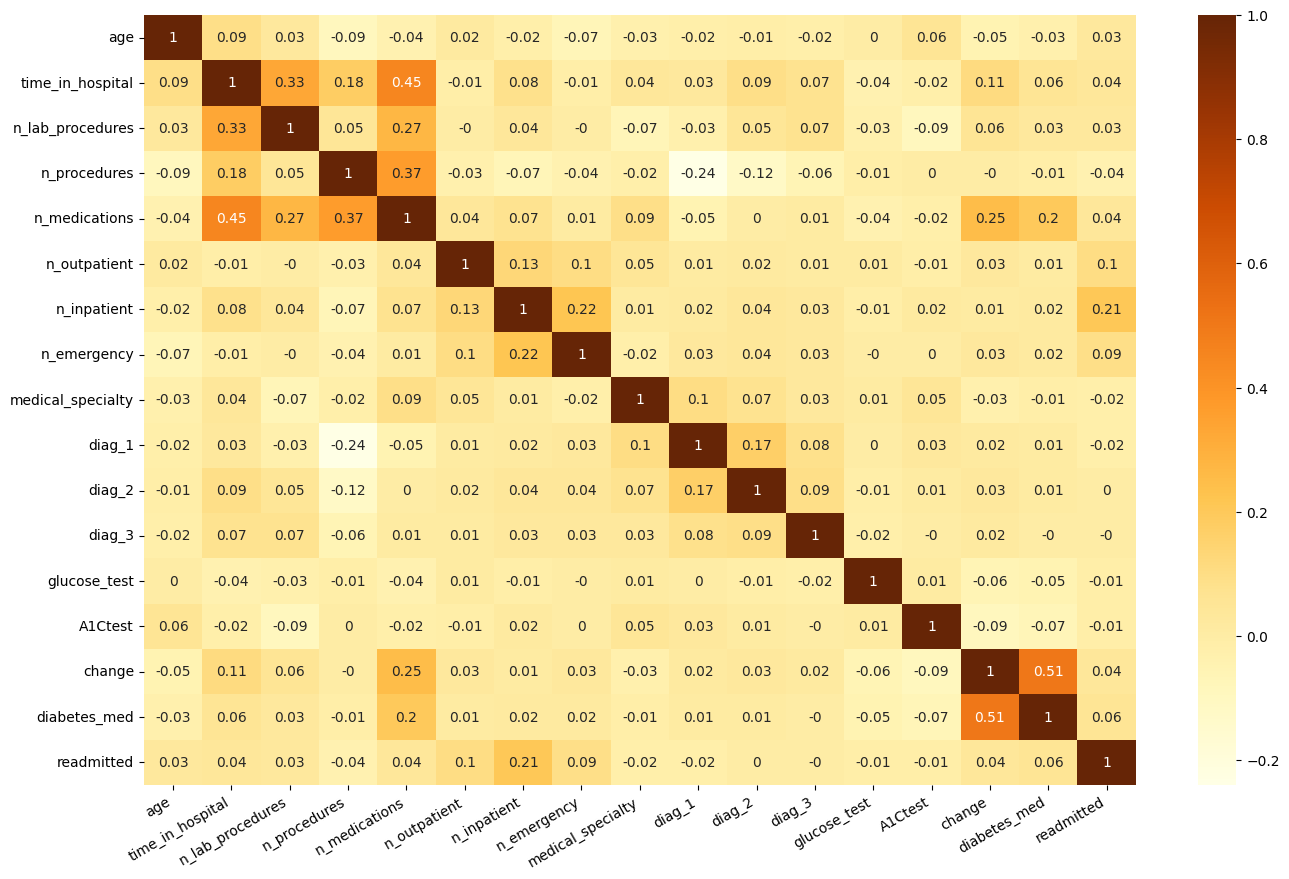

In [ ]:
corr = df.corr().round(2)

plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, cmap='YlOrBr')

plt.xticks(rotation=30, ha='right') 

plt.show()


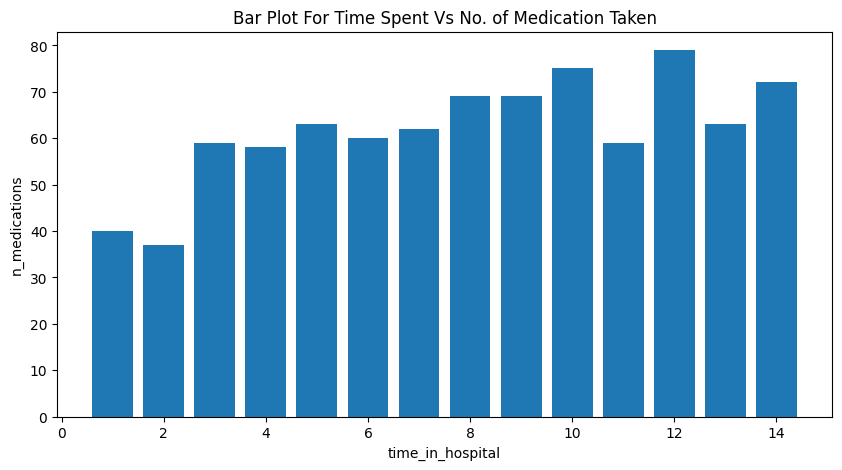

In [14]:
plt.figure(figsize=(10, 5))
plt.bar(df["time_in_hospital"], df["n_medications"])
plt.xlabel("time_in_hospital")
plt.ylabel("n_medications")
plt.title("Bar Plot For Time Spent Vs No. of Medication Taken")
plt.show()

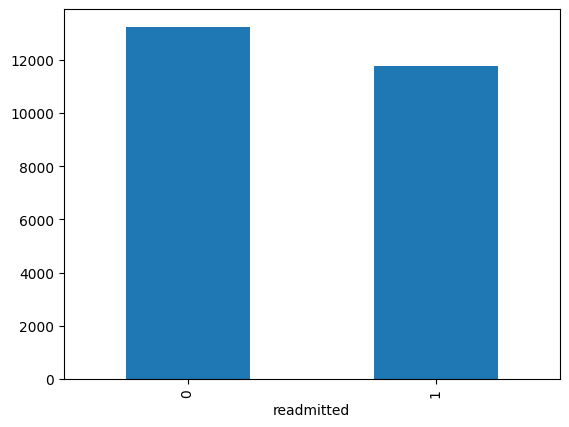

In [15]:
df['readmitted'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
columns = ["time_in_hospital", "n_lab_procedures", "n_procedures", "n_medications", "n_outpatient", "n_inpatient", "n_emergency"]

for column in columns:
    df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))  # Reshape to 2D array

df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,3,0.538462,0.633929,0.166667,0.217949,0.060606,0.0,0.0,4,0,7,6,1,1,0,1,0
1,3,0.153846,0.294643,0.333333,0.153846,0.000000,0.0,0.0,5,6,6,6,1,1,0,1,0
2,1,0.307692,0.392857,0.000000,0.217949,0.000000,0.0,0.0,4,0,0,0,1,1,1,1,1
3,3,0.076923,0.312500,0.000000,0.141026,0.030303,0.0,0.0,4,0,6,1,1,1,1,1,1
4,2,0.000000,0.366071,0.000000,0.076923,0.000000,0.0,0.0,3,6,0,7,1,1,0,1,0


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [90]:
x = df.drop(columns = ['readmitted'], axis = 1)
y= df['readmitted']
x

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med
0,3,0.538462,0.633929,0.166667,0.217949,0.060606,0.000000,0.0,4,0,7,6,1,1,0,1
1,3,0.153846,0.294643,0.333333,0.153846,0.000000,0.000000,0.0,5,6,6,6,1,1,0,1
2,1,0.307692,0.392857,0.000000,0.217949,0.000000,0.000000,0.0,4,0,0,0,1,1,1,1
3,3,0.076923,0.312500,0.000000,0.141026,0.030303,0.000000,0.0,4,0,6,1,1,1,1,1
4,2,0.000000,0.366071,0.000000,0.076923,0.000000,0.000000,0.0,3,6,0,7,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,4,1.000000,0.678571,0.166667,0.371795,0.000000,0.000000,0.0,4,0,6,0,1,2,0,0
24996,4,0.076923,0.580357,0.000000,0.294872,0.000000,0.000000,0.0,4,2,3,6,1,0,1,1
24997,3,0.307692,0.098214,0.000000,0.064103,0.000000,0.066667,0.0,4,6,6,6,2,1,0,0
24998,3,0.076923,0.535714,0.500000,0.179487,0.000000,0.000000,0.0,2,7,1,6,1,1,1,1


In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [92]:
lg = LogisticRegression()

param = {
    'penalty': ['l1', 'l2'],
    'C': [25,30,35,40,50,100],
    'solver': ["sag", "saga","newton-cg", 'liblinear']
}

gs = GridSearchCV(lg, param, n_jobs=-1, return_train_score=True)
gs.fit(x_train,y_train)

print(gs.best_params_)


{'C': 30, 'penalty': 'l1', 'solver': 'liblinear'}


c:\Users\omarn\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\omarn\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\omarn\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\omarn\AppDa

In [93]:
lg = LogisticRegression(C= 50, penalty='l1', solver='liblinear')
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)

In [94]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:", classification_report(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

Accuracy: 0.6024
Report:               precision    recall  f1-score   support

           0       0.58      0.80      0.67      2582
           1       0.64      0.40      0.49      2418

    accuracy                           0.60      5000
   macro avg       0.61      0.60      0.58      5000
weighted avg       0.61      0.60      0.59      5000

Confusion Matrix: [[2054  528]
 [1460  958]]


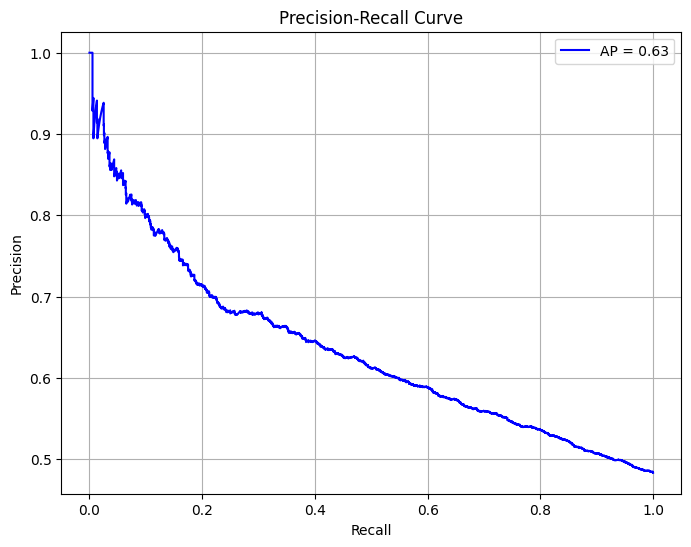

In [ ]:
# Calculate precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, lg.predict_proba(x_test)[:, 1])

# Calculate the average precision score
avg_precision = average_precision_score(y_test, lg.predict_proba(x_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

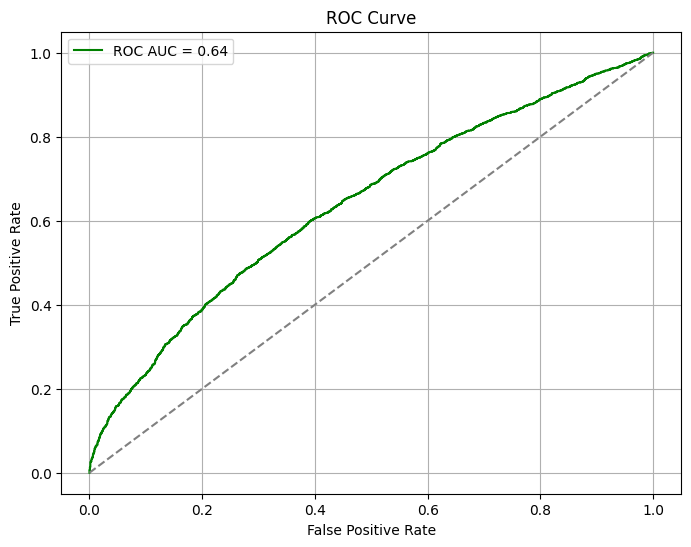

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(x_test)[:, 1])
roc_auc = roc_auc_score(y_test, lg.predict_proba(x_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

In [97]:
rfc = RandomForestClassifier(random_state=42)

param = {
    'n_estimators': [10,30,50,60,75],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,10,30,50,None]
}

gs = GridSearchCV(rfc, param, n_jobs=-1, return_train_score=True)
gs.fit(x_train,y_train)

print(gs.best_params_)


{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 75}


In [98]:
rfc = RandomForestClassifier(criterion= 'gini', max_depth= 10, n_estimators= 30, random_state=42)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

In [99]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:", classification_report(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

Accuracy: 0.6136
Report:               precision    recall  f1-score   support

           0       0.60      0.74      0.67      2582
           1       0.63      0.47      0.54      2418

    accuracy                           0.61      5000
   macro avg       0.62      0.61      0.60      5000
weighted avg       0.62      0.61      0.61      5000

Confusion Matrix: [[1920  662]
 [1270 1148]]


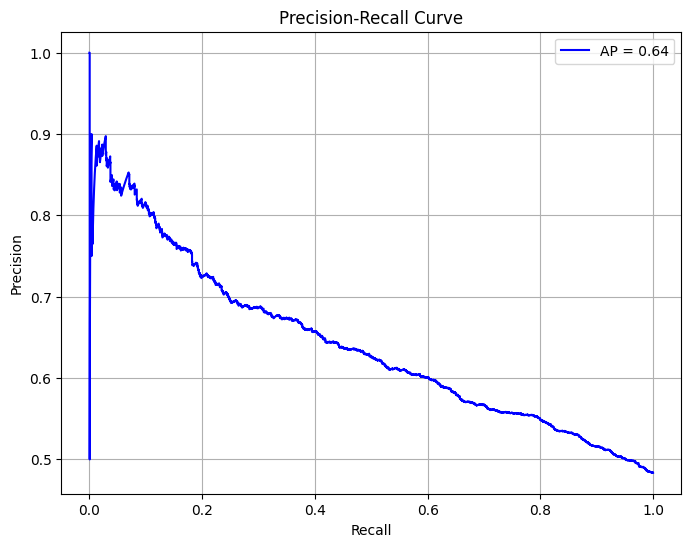

In [ ]:
# Calculate precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, rfc.predict_proba(x_test)[:, 1])

# Calculate the average precision score 
avg_precision = average_precision_score(y_test, rfc.predict_proba(x_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

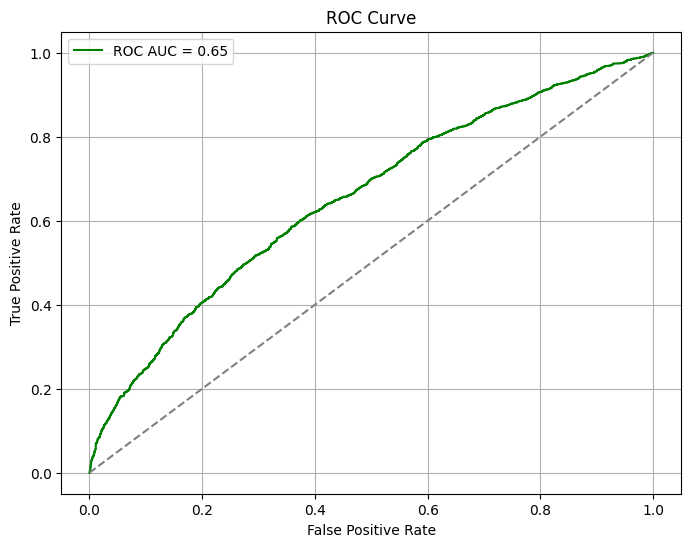

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(x_test)[:, 1])

roc_auc = roc_auc_score(y_test, rfc.predict_proba(x_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
gbc = GradientBoostingClassifier(random_state=42)

param = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.01, 0.1, 0.5],
    'criterion': ['friedman_mse', 'squared_error'],  
    'n_estimators': [10, 30, 50],
    'max_depth': [5, 10, 30],
    'n_iter_no_change': [3, 5]
}

gs = GridSearchCV(gbc, param, n_jobs=-1,error_score='raise')
gs.fit(x_train,y_train)

try:
    gs.fit(x_train, y_train)
    print("Best Parameters:", gs.best_params_)
except Exception as e:
    print("Error during GridSearchCV:", e)


Best Parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 5, 'n_estimators': 50, 'n_iter_no_change': 5}


In [ ]:
gbc = GradientBoostingClassifier(loss= 'exponential', criterion= 'friedman_mse', learning_rate= 0.1, max_depth=5, n_estimators=50, n_iter_no_change = 5, random_state=42)
gbc.fit(x_train,y_train)
y_pred = gbc.predict(x_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:", classification_report(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

Accuracy: 0.6024
Report:               precision    recall  f1-score   support

           0       0.58      0.80      0.67      2582
           1       0.64      0.40      0.49      2418

    accuracy                           0.60      5000
   macro avg       0.61      0.60      0.58      5000
weighted avg       0.61      0.60      0.59      5000

Confusion Matrix: [[2054  528]
 [1460  958]]


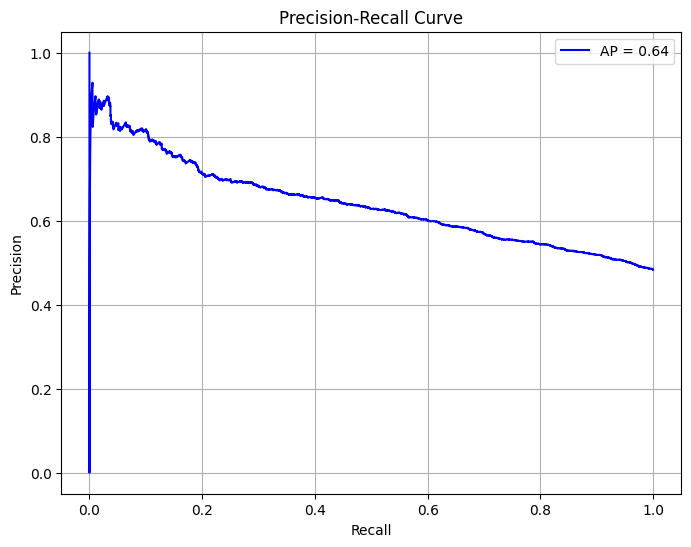

In [ ]:
# Calculate precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, gbc.predict_proba(x_test)[:, 1])

# Calculate the average precision score (area under the curve)
avg_precision = average_precision_score(y_test, gbc.predict_proba(x_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

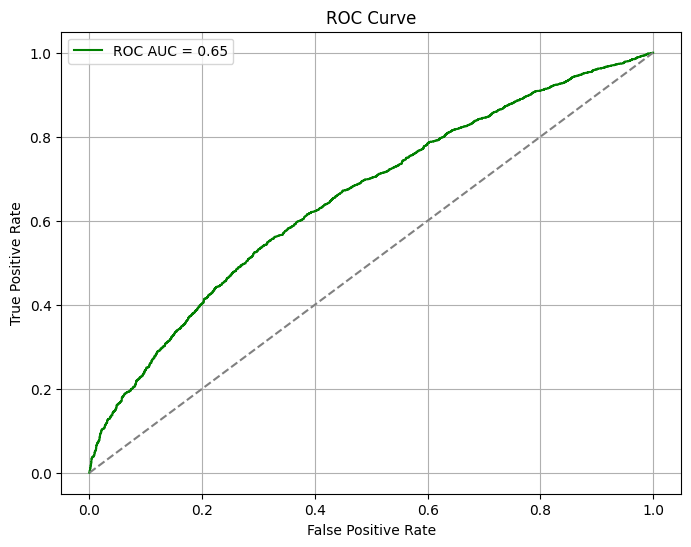

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, gbc.predict_proba(x_test)[:, 1])

roc_auc = roc_auc_score(y_test, gbc.predict_proba(x_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()